<a href="https://colab.research.google.com/github/Dorsaf-GH/Exercice_OpenClass/blob/master/GHOZLANI_Dorsaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




---



# **Sujet : Classification d’images avec un réseau de neurones à convolution**



---





In [ ]:
#!pip install tensorflow==2.0.0-alpha0 
!pip3 install --upgrade tensorflow 

In [ ]:
import tensorflow as tf
import numpy as  np
from tensorflow import keras

In [ ]:
from keras.datasets  import cifar10
(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )


170500096/170498071 [==============================] - 2s 0us/step


# **I. Décrivez le jeu de données**






*   CIFAR-10
La base d’image de CIFAR-10 se compose de 60000 images, les images ont une structure de (32,32,3) qui correspond à (largeur, hauteur, RGB).
 Dans cette base on trouve 50000 images pour l’apprentissage et 10000 images pour le test



[0]


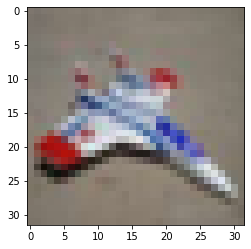

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[30])
print(y_train[30])



In [ ]:
 #Nombres  d'images d’apprentissages, depth, height, width
num_train, depth, height, width = X_train.shape
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#Nombres d'images de test
num_test = X_test.shape[0] 
num_test



10000

In [ ]:
 #Nombres total d'images
nombre_images=num_train+ X_test.shape[0]
nombre_images

60000

In [ ]:
#Le nombre de classes
num_classes = np.unique(y_train).shape[0] # 10 classes
num_classes

10

# **II. Entraînez un réseau de neurones standard**

# **réseau de neurones standard**


---

#Architecture (1)
    
1.   Reseau des neurones **1 couche cachée** avec **256 neurones**, et un nombre d**epochs=15**. Mettre fin à l'entrainement si on a une  **accuracy >0.7** 



















In [ ]:

import numpy as np
from tensorflow.keras.utils import to_categorical

# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.7)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 


from keras.datasets  import cifar10
(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )


class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	]               

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)  

model = tf.keras.models.Sequential([
        #Couche  d'entrée Input layer 
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        # 1 hidden layer  avec 256 neuronnes et une fonction d'activation RELU
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        # Output layet  avec 10 neuronnes parcequ'on a 10 classes et une fonction d'activation Softmax 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                        ])

model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)
# Afficher le temps d'execution pour le training
import time
start_time = time.time()
#Nombres d'epochs =15
history =  model.fit(
    X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")  
history2=model.evaluate(X_test , y_test)
print("\nLoss_training, Accuracy_training, Accuracy_validation , [Loss_test, Accuracy_test] ")  
print(history.history['loss'][-1],  history.history['accuracy'][-1],history.history['val_accuracy'][-1],history2)

Epoch 1/15
625/625 [==============================] - 7s 10ms/step - loss: 2.1626 - accuracy: 0.2594 - val_loss: 1.8334 - val_accuracy: 0.3464
Epoch 2/15
625/625 [==============================] - 6s 9ms/step - loss: 1.7706 - accuracy: 0.3686 - val_loss: 1.7608 - val_accuracy: 0.3833
Epoch 3/15
625/625 [==============================] - 6s 9ms/step - loss: 1.6902 - accuracy: 0.3998 - val_loss: 1.6996 - val_accuracy: 0.4001
Epoch 4/15
625/625 [==============================] - 6s 9ms/step - loss: 1.6581 - accuracy: 0.4128 - val_loss: 1.6698 - val_accuracy: 0.4076
Epoch 5/15
625/625 [==============================] - 6s 9ms/step - loss: 1.6219 - accuracy: 0.4240 - val_loss: 1.6432 - val_accuracy: 0.4210
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 1.5836 - accuracy: 0.4351 - val_loss: 1.6061 - val_accuracy: 0.4279
Epoch 7/15
625/625 [==============================] - 6s 9ms/step - loss: 1.5594 - accuracy: 0.4454 - val_loss: 1.6187 - val_accuracy: 0.4352
Epoch

**Tabelau detaillé**

pour chaque classe, on a la precision sur le test

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=y))

NameError: ignored



---


* Dans cette architecture , on remarque que pour 15 epochs , l'accuracy =0.49 pour le training est inférieur au seuil prédefini (l'entrainement ne peut pas atteindre une  accuracy > 0.7), cela indique que le  réseau neuronal est précis à environ 49% dans la classification des données d'entraînement. C'est-à-dire qu'il a trouvé une correspondance de motif entre l'image et les labels qui fonctionnait avec 49%.
 la valeur de Loss est assez imporatnte pour l'entrainement et pour le test {loss_training =1.44 et Loss_test=1.52} et une accuracy =0.46 ce qui signifie qu'il est moins précis sur le test set

* Temps d'exécution = 89.14 seconds (1.48 min)



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


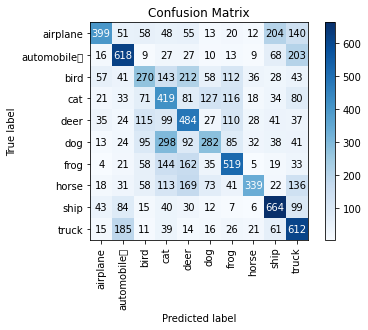

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* La matrice de confusion permet d’évaluer la performance de notre modèle, puisqu’elle reflète
les métriques du Vrai positif, Vrai négatif, Faux positif et Faux négatif. Cette figure illustre
de près la position de ces métriques pour chaque classe. A titre d’exemple le modèle  a mal classé les images bird et airplane.



---


*   Graphe(1):  montre l'evolution de Training and validation accuracy vs le nombre d'epochs 
*   Graphe(2):  montre l'evolution de Training and validation loss vs le nombre d'epochs







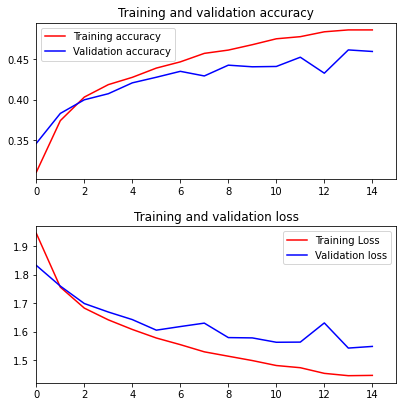

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

* L'accuracy de training  et de la validation augmente avec le nombre
d’époque, ceci reflète qu’à chaque époque le modèle apprenne plus d’informations. 
De même, pour le loss de training  et de la validation diminue avec le nombre d’époque

# **Réseau de neurones standard**


---
#Architecture (1)

    
2.  Reseau des neurones **1 couche cachée** avec **256 neurones** et un nombre **d'epochs=100**. mettre fin à l'entrainement si on a une  **accuracy >0.7** 

 


In [ ]:

import numpy as np
from tensorflow.keras.utils import to_categorical

# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.7)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 


from keras.datasets  import cifar10
(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )



class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	]               

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)  

model = tf.keras.models.Sequential([
        #Couche  d'entrée Input layer 
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        # 1 hidden layer  avec 256 neuronnes et une fonction d'activation RELU
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        # Output layet  avec 10 neuronnes parcequ'on a 10 classes et une fonction d'activation Softmax 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                        ])

model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)
# Afficher le temps d'execution pour le training
import time
start_time = time.time()
#Nombres d'epochs =100
# The CIFAR-10 data set est divisé en un ensemble de training et un ensemble de test, mais pas un ensemble de validation par défaut.
# Cependant, nous pouvons facilement diviser l'ensemble d'entraînement en un nouvel ensemble d'entraînement(80%) et un ensemble de validation(20%)
history =  model.fit(
    X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")  
history2=model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training, Accuracy_validation , [Loss_test, Accuracy_test] ")  
print(history.history['loss'][-1],  history.history['accuracy'][-1],history.history['val_accuracy'][-1],history2)



Epoch 1/100
625/625 [==============================] - 7s 10ms/step - loss: 2.1057 - accuracy: 0.2640 - val_loss: 1.8391 - val_accuracy: 0.3437
Epoch 2/100
625/625 [==============================] - 6s 10ms/step - loss: 1.7497 - accuracy: 0.3858 - val_loss: 1.7259 - val_accuracy: 0.3862
Epoch 3/100
625/625 [==============================] - 6s 10ms/step - loss: 1.6744 - accuracy: 0.4075 - val_loss: 1.7150 - val_accuracy: 0.3857
Epoch 4/100
625/625 [==============================] - 6s 10ms/step - loss: 1.6271 - accuracy: 0.4194 - val_loss: 1.6375 - val_accuracy: 0.4186
Epoch 5/100
625/625 [==============================] - 6s 10ms/step - loss: 1.5910 - accuracy: 0.4386 - val_loss: 1.6312 - val_accuracy: 0.4213
Epoch 6/100
625/625 [==============================] - 6s 10ms/step - loss: 1.5644 - accuracy: 0.4446 - val_loss: 1.5899 - val_accuracy: 0.4423
Epoch 7/100
625/625 [==============================] - 6s 10ms/step - loss: 1.5427 - accuracy: 0.4514 - val_loss: 1.6285 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.53      0.55      0.54      1000
 automobile	       0.53      0.60      0.56      1000
        bird       0.42      0.30      0.35      1000
         cat       0.32      0.29      0.30      1000
        deer       0.45      0.42      0.44      1000
         dog       0.36      0.48      0.41      1000
        frog       0.59      0.45      0.51      1000
       horse       0.52      0.53      0.53      1000
        ship       0.59      0.63      0.61      1000
       truck       0.49      0.52      0.50      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000





---


* On remarque  l'accuracy pour le training < 0.7 même avec un nombre d'epochs=100 l'accuracy pour = 0.58. La valeur de Loss est assez imporatnte pour l'entrainement et pour le test {loss_training =1.16 et Loss_test=1.57} et une accuracy = 0.48 ce qui signifie qu'il est un peu moins précis sur le test set. Aussi  on remarque que la valeur de loss cesse de diminuer, et parfois augmente. C’est l'effet 'overfitting'.

* Temps d'exécution = 611.26 seconds (10.18 min )

* Temps d'exécution long, nombre d'epochs=100, mais l'augmentation de 

* ===>  temps d'exécution long, nombre d'epochs=100:
  *   100 epochs :accuracy = 0.48
  *   15  epochs :accuracy = 0.46




/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


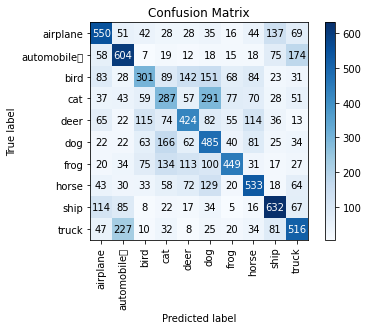

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* Comme indiqué ci dessus, la matrice de confusion permet d’évaluer la performance de notre modèle, puisqu’elle reflète
les métriques du Vrai positif, Vrai négatif, Faux positif et Faux négatif. 
* Cette fois lorsque on augmente le nombres d'epochs, on constate une amelioration pour les images de airplane par contre  le modèle  a mal classé les images bird et cat.


---


*   Graphe(1):  montre l'evolution de Training and validation accuracy vs le nombre d'epochs 
*   Graphe(2):  montre l'evolution de Training and validation loss vs le nombre d'epochs

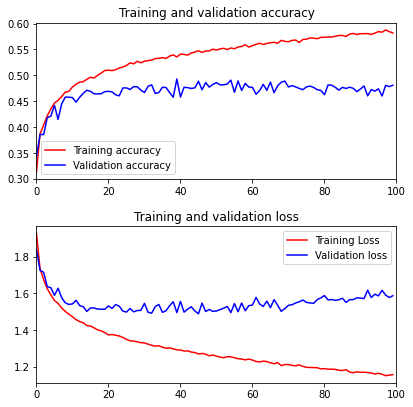

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

* À partir des deux graphiques ci-dessus, on peut voir que l'accuracy de validation est presque devenue constante après 8 epochs. Au début, l'accuracy de la validation augmentait linéairement avec l'accuracy de training ce qui montre l'effet d'overfitting. et c'est pareil pour le loss validation

* ===> donc l'utilise Dropout qui un est une technique de régularisation pour réduire le overfitting dans l'architecture(2)

# **réseau de neurones standard**


---
#Architecture (2)

    
1.   Reseau des neurones **2 couches cachées** avec **512 neurones**, et un nombre d**epochs=15**. Mettre fin à l'entrainement si on a une  **accuracy >0.7** 


In [ ]:

import numpy as np
from tensorflow.keras.utils import to_categorical


from keras.datasets  import cifar10
(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )


class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	]               

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)  

model = tf.keras.models.Sequential([
        #Couche  d'entrée Input layer 
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        # 2 hidden layer  avec 512 neuronnes et une fonction d'activation RELU
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        # Output layet  avec 10 neuronnes parcequ'on a 10 classes et une fonction d'activation Softmax 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                        ])

model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)
# Afficher le temps d'execution pour le training
import time
start_time = time.time()

# The CIFAR-10 data set est divisé en un ensemble de training et un ensemble de test, mais pas un ensemble de validation par défaut.
# Cependant, nous pouvons facilement diviser l'ensemble d'entraînement en un nouvel ensemble d'entraînement(80%) et un ensemble de validation(20%)
#Nombres d'epochs =15
history =  model.fit(
    X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))

print("\n Model.evaluate : ")  
history2=model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],history2)




Epoch 1/15
625/625 [==============================] - 14s 22ms/step - loss: 2.0966 - accuracy: 0.2505 - val_loss: 1.7811 - val_accuracy: 0.3592
Epoch 2/15
625/625 [==============================] - 14s 22ms/step - loss: 1.7837 - accuracy: 0.3522 - val_loss: 1.7257 - val_accuracy: 0.3757
Epoch 3/15
625/625 [==============================] - 15s 24ms/step - loss: 1.7190 - accuracy: 0.3776 - val_loss: 1.6549 - val_accuracy: 0.4116
Epoch 4/15
625/625 [==============================] - 15s 24ms/step - loss: 1.6655 - accuracy: 0.3980 - val_loss: 1.6144 - val_accuracy: 0.4199
Epoch 5/15
625/625 [==============================] - 14s 22ms/step - loss: 1.6362 - accuracy: 0.4132 - val_loss: 1.6213 - val_accuracy: 0.4191
Epoch 6/15
625/625 [==============================] - 14s 22ms/step - loss: 1.6227 - accuracy: 0.4178 - val_loss: 1.6188 - val_accuracy: 0.4268
Epoch 7/15
625/625 [==============================] - 14s 22ms/step - loss: 1.5947 - accuracy: 0.4297 - val_loss: 1.5602 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.47      0.61      0.53      1000
 automobile	       0.62      0.49      0.55      1000
        bird       0.38      0.36      0.37      1000
         cat       0.37      0.21      0.27      1000
        deer       0.40      0.40      0.40      1000
         dog       0.47      0.30      0.36      1000
        frog       0.45      0.59      0.51      1000
       horse       0.46      0.57      0.51      1000
        ship       0.58      0.57      0.58      1000
       truck       0.48      0.59      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.46     10000
weighted avg       0.47      0.47      0.46     10000





---


* Architecture( **2 couches cachées** avec **512 neurones**). Une accuracy= 0.47  Sur le  training pour 15 epochs et une accuracy sur le test set = 0.47 contrairement à la  première architecture, une accuracy sur le test set = 0.48 pour 100 epochs.

* cette accuracy indique que le  réseau neuronal est précis à environ 47% dans la classification des données de test. 

* Temps d'exécution = 210.07 seconds (3.50 min) 

===> On remarque que le training prend plus de temps d'exécution par rapport temps d'exécution d'architecture (1)
Dans la section suivante, on va exécuter ce modéle pour 100 epochs pour voir si cela engendre une amélioration

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


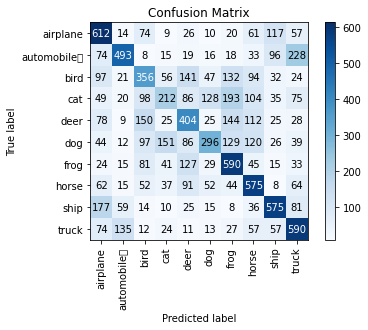

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* Comme illustré dans la matrice de confusion , le modèle  a mal classé les images cat et bird.

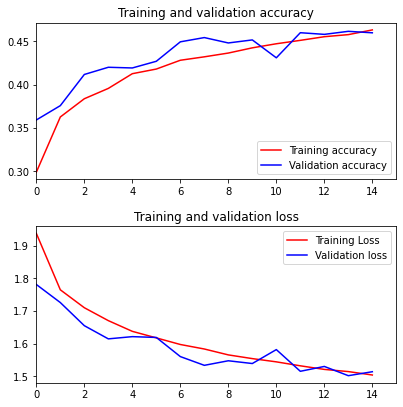

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

* L'accuracy de training  et de la validation augmente avec le nombre
d’epochs, ceci reflète qu’à chaque époque le modèle apprenne plus d’informations. 
De même, pour le loss de training  et de la validation diminue avec le nombre d’epochs



# **réseau de neurones standard**


---
#Architecture (2)

    
2.   Reseau des neurones **2 couches cachées** avec **512 neurones**, et un nombre d'**epochs=100**. Mettre fin à l'entrainement si on a une  **accuracy >0.7** 


In [ ]:

import numpy as np
from tensorflow.keras.utils import to_categorical



from keras.datasets  import cifar10
(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )


class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	]               

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)  

model = tf.keras.models.Sequential([
        #Couche  d'entrée Input layer 
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        # 2 hidden layer  avec 512 neuronnes et une fonction d'activation RELU
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        # Output layet  avec 10 neuronnes parcequ'on a 10 classes et une fonction d'activation Softmax 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                        ])

model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)
# Afficher le temps d'execution pour le training
import time
start_time = time.time()

# The CIFAR-10 data set est divisé en un ensemble de training et un ensemble de test, mais pas un ensemble de validation par défaut.
# Cependant, nous pouvons facilement diviser l'ensemble d'entraînement en un nouvel ensemble d'entraînement(80%) et un ensemble de validation(20%)
#Nombres d'epochs =100
history =  model.fit(
    X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")  
history2=model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],history2)




Epoch 1/100
625/625 [==============================] - 15s 23ms/step - loss: 2.0470 - accuracy: 0.2573 - val_loss: 1.7628 - val_accuracy: 0.3663
Epoch 2/100
625/625 [==============================] - 14s 22ms/step - loss: 1.7857 - accuracy: 0.3574 - val_loss: 1.7279 - val_accuracy: 0.3827
Epoch 3/100
625/625 [==============================] - 14s 22ms/step - loss: 1.7094 - accuracy: 0.3868 - val_loss: 1.6186 - val_accuracy: 0.4203
Epoch 4/100
625/625 [==============================] - 14s 22ms/step - loss: 1.6473 - accuracy: 0.4084 - val_loss: 1.6177 - val_accuracy: 0.4246
Epoch 5/100
625/625 [==============================] - 15s 24ms/step - loss: 1.6277 - accuracy: 0.4127 - val_loss: 1.5835 - val_accuracy: 0.4385
Epoch 6/100
625/625 [==============================] - 14s 22ms/step - loss: 1.6111 - accuracy: 0.4192 - val_loss: 1.5695 - val_accuracy: 0.4438
Epoch 7/100
625/625 [==============================] - 14s 22ms/step - loss: 1.5769 - accuracy: 0.4323 - val_loss: 1.5533 - val_ac

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.60      0.54      0.57      1000
 automobile	       0.58      0.61      0.59      1000
        bird       0.44      0.34      0.38      1000
         cat       0.32      0.34      0.33      1000
        deer       0.42      0.37      0.39      1000
         dog       0.44      0.31      0.36      1000
        frog       0.42      0.65      0.51      1000
       horse       0.62      0.56      0.59      1000
        ship       0.54      0.71      0.61      1000
       truck       0.58      0.47      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000





---


* Architecture( **2 couches cachées** avec **512 neurones**), une accuracy = 0.57 sur l'entrainement,cette valeur < au  seuil  d'accuracy prédifini et une accuracy sur le test =0.49  pour un nombre d'epochs = 100,contrairement à la  première architecture,  une accuracy = 0.47 pour une nombre d'epochs =100.

* Temps d'exécution = 1391.67 seconds (23.19 min) ,la temps d'exécution trés long pour 100 epochs et pour seulement  pour une accuracy =50%  sur le test 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


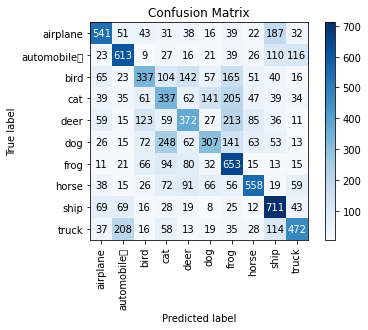

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* Comme illustré dans la matrice de confusion , le modèle  a mal classé les images cat bird et dog, l'augmentation de nombres d'epochs n'a pas engendré une amelioration.

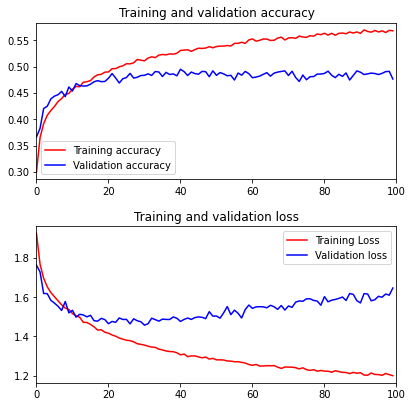

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

 * L'accuracy de la  validation est presque devenue constante  après 8 à 9 epochs. 
Le loss  validation a diminué de manière linéaire, mais après  9 à 10 epochs, il a commencé à augmenter. Cela signifie que le modèle a essayé de mémoriser les données et a réussi.


# **Réseau de neurones standard**


---
#Architecture (3)

    
1.   Reseau des neurones **4 couches cachées** 

 *   couche cachée (1): 1024 neurones
 *   couche cachée (2): 1024 neurones
 *   couche cachée (3): 512 neurones
 *   couche cachée (4): 256 neurones


 

avec un nombre d'**epochs=15**. Mettre fin à l'entrainement si on a une  **accuracy >0.7** 


In [ ]:

import numpy as np
from tensorflow.keras.utils import to_categorical

# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.7)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 


from keras.datasets  import cifar10
(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )


class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	]               

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)  

model = tf.keras.models.Sequential([
        #Couche  d'entrée Input layer 
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        # 4 hidden layer  
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        # Output layet  avec 10 neuronnes parcequ'on a 10 classes et une fonction d'activation Softmax 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                        ])

model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)
# Afficher le temps d'execution pour le training
import time
start_time = time.time()

# The CIFAR-10 data set est divisé en un ensemble de training et un ensemble de test, mais pas un ensemble de validation par défaut.
# Cependant, nous pouvons facilement diviser l'ensemble d'entraînement en un nouvel ensemble d'entraînement(80%) et un ensemble de validation(20%)
#Nombres d'epochs =15
history =  model.fit(
    X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")  
history2=model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],history2)




Epoch 1/15
625/625 [==============================] - 38s 60ms/step - loss: 2.0764 - accuracy: 0.2303 - val_loss: 1.8533 - val_accuracy: 0.3172
Epoch 2/15
625/625 [==============================] - 37s 59ms/step - loss: 1.8144 - accuracy: 0.3435 - val_loss: 1.7542 - val_accuracy: 0.3686
Epoch 3/15
625/625 [==============================] - 37s 60ms/step - loss: 1.7399 - accuracy: 0.3702 - val_loss: 1.7031 - val_accuracy: 0.3900
Epoch 4/15
625/625 [==============================] - 37s 59ms/step - loss: 1.7013 - accuracy: 0.3901 - val_loss: 1.6181 - val_accuracy: 0.4214
Epoch 5/15
625/625 [==============================] - 38s 62ms/step - loss: 1.6521 - accuracy: 0.4040 - val_loss: 1.6011 - val_accuracy: 0.4255
Epoch 6/15
625/625 [==============================] - 37s 60ms/step - loss: 1.6130 - accuracy: 0.4175 - val_loss: 1.5907 - val_accuracy: 0.4262
Epoch 7/15
625/625 [==============================] - 39s 63ms/step - loss: 1.5968 - accuracy: 0.4214 - val_loss: 1.5398 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.46      0.66      0.54      1000
 automobile	       0.65      0.51      0.57      1000
        bird       0.38      0.23      0.29      1000
         cat       0.36      0.28      0.32      1000
        deer       0.37      0.48      0.42      1000
         dog       0.41      0.39      0.40      1000
        frog       0.50      0.47      0.49      1000
       horse       0.51      0.56      0.53      1000
        ship       0.56      0.61      0.58      1000
       truck       0.53      0.53      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000





---


* une accuracy= 0.47 sur le training,et une accuracy sur le test = 0.47 pour 15 epochset meme valeur pour l'accuracy validation, et malgré que  l'accuracy sur le training et la validation donne  la meme valeur. Cete valeur reste faible.

* Temps d'exécution = 562.51 seconds (9.37 min) ,le training prend plus de temps

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


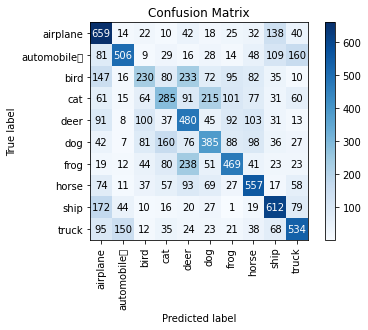

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* Comme illustré dans la matrice de confusion ,  le modèle  a mal classé les images cat et bird pour toutes les architectures qu'on a vu ci dessus.

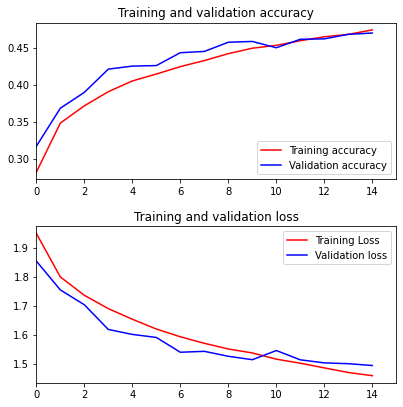

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


* L'accuracy de training et de la validation augmente avec le nombre d’epochs, ceci reflète qu’à chaque époque le modèle apprenne plus d’informations. De même, pour le loss de training et de la validation diminue avec le nombre d’epochs

# **Réseau de neurones standard**


---
#Architecture (3)

    
2.   Reseau des neurones **4 couches cachées** 

 *   couche cachée (1): 1024 neurones
 *   couche cachée (2): 1024 neurones
 *   couche cachée (3): 512 neurones
 *   couche cachée (4): 256 neurones


 

avec un nombre d'**epochs=100**. Mettre fin à l'entrainement si on a une  **accuracy >0.7** 

In [ ]:

import numpy as np
from tensorflow.keras.utils import to_categorical

# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.7)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 


from keras.datasets  import cifar10
(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )


class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	]               

X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)  

model = tf.keras.models.Sequential([
        #Couche  d'entrée Input layer 
        tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        # 4 hidden layer  
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        # Output layet  avec 10 neuronnes parcequ'on a 10 classes et une fonction d'activation Softmax 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                        ])

model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)
# Afficher le temps d'execution pour le training
import time
start_time = time.time()

# The CIFAR-10 data set est divisé en un ensemble de training et un ensemble de test, mais pas un ensemble de validation par défaut.
# Cependant, nous pouvons facilement diviser l'ensemble d'entraînement en un nouvel ensemble d'entraînement(80%) et un ensemble de validation(20%)
#Nombres d'epochs =100
history =  model.fit(
    X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")  
history2=model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],history2)




Epoch 1/100
625/625 [==============================] - 38s 60ms/step - loss: 2.0711 - accuracy: 0.2356 - val_loss: 1.7813 - val_accuracy: 0.3485
Epoch 2/100
625/625 [==============================] - 37s 60ms/step - loss: 1.8152 - accuracy: 0.3398 - val_loss: 1.7702 - val_accuracy: 0.3589
Epoch 3/100
625/625 [==============================] - 38s 60ms/step - loss: 1.7456 - accuracy: 0.3692 - val_loss: 1.6785 - val_accuracy: 0.3986
Epoch 4/100
625/625 [==============================] - 38s 60ms/step - loss: 1.6861 - accuracy: 0.3949 - val_loss: 1.6774 - val_accuracy: 0.4005
Epoch 5/100
625/625 [==============================] - 38s 61ms/step - loss: 1.6498 - accuracy: 0.4019 - val_loss: 1.5991 - val_accuracy: 0.4256
Epoch 6/100
625/625 [==============================] - 38s 60ms/step - loss: 1.6158 - accuracy: 0.4160 - val_loss: 1.5841 - val_accuracy: 0.4335
Epoch 7/100
625/625 [==============================] - 38s 61ms/step - loss: 1.5922 - accuracy: 0.4233 - val_loss: 1.5769 - val_ac

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.56      0.60      0.58      1000
 automobile	       0.62      0.46      0.53      1000
        bird       0.38      0.35      0.37      1000
         cat       0.32      0.34      0.33      1000
        deer       0.38      0.35      0.37      1000
         dog       0.42      0.33      0.37      1000
        frog       0.44      0.62      0.52      1000
       horse       0.55      0.51      0.53      1000
        ship       0.58      0.62      0.60      1000
       truck       0.50      0.55      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000





---


* Une accuracy= 0.68  sur le training,et une accuracy sur le test = 0.47 
pour 100 epochs.

===> On remarque que lorsque on augmente le nombre d'epochs de 15 à 100, l'accuracy est n'augmente sur le training (de 0,47 à 0,67) mais elle reste constante sur le test donc meme si on agmente le nombre d'epochs =100 cela n'ameliore pas l'accuracy sur le test.

* Temps d'exécution =3801.39 seconds (63.35 min) ,le training prend plus de temps.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


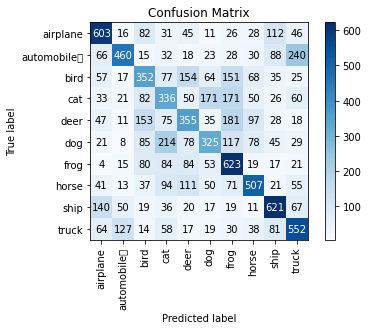

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

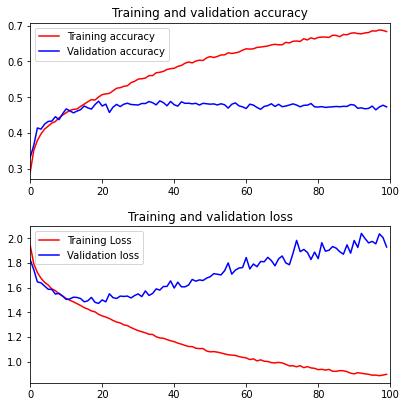

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


**Tableau de comparaison des résultats**

* Le tableau ci-dessous montre les différents résultats obtenus sur les trois modèles
* Pour notre premier modèle , on remarque qu’à chaque fois qu’on augmente le nombre d'epochs, le taux de l'accuracy augmente  ou bien reste constant (Modéle 3).

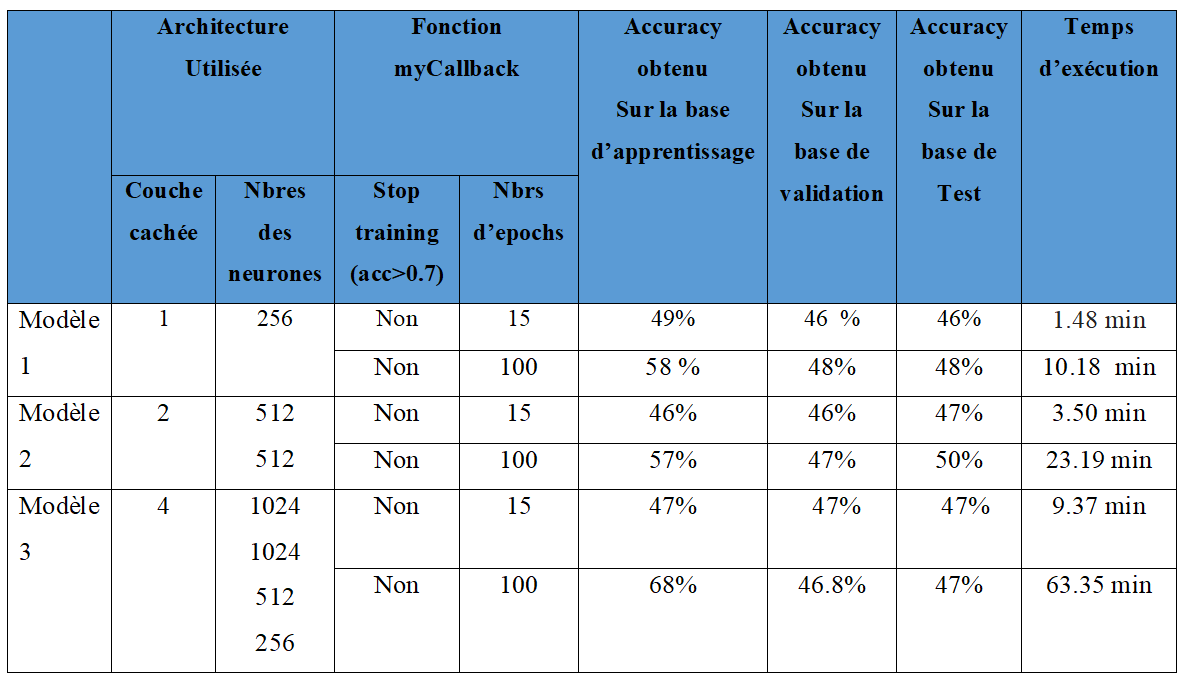


* ====> Malgré toutes les  architectures utilisées qu'on a utlisé et meme l'augmentation de nombre d'epochs jusqu'a 100, l'accuracy reste toujours inférieur 0.7 donc le passage au réseau de neurones Convolutif

# **III. Décrivez les réseaux de neurones à convolution**

# **Réseau neuronal convolutif**


---

* Les réseaux neuronaux convolutifs ont de larges applications dans la reconnaissance d'image et vidéo, les systèmes de recommandation et le traitement du langage naturel.











     






* Le Réseau de neurones Convolutif à pour avantage de n’avoir que quelques poids à calculer(ceux du filtre) et qu’elle les réutilises pour l’ensemble de l’image, tandis que les autres réseaux de neurones vont avoir un poids unique à calculer pour chaque neurone.
*  Ce réseau utilise relativement peu de pré-traitement. Cela signifie que le réseau est responsable de faire évoluer tout seul ses propres filtres

* Cette méthode réduit l'empreinte mémoire, améliore les performances

# **IV. Utilisez un réseau de neurones convolutif**

# **Réseau de neurones Convolutif**


---
#Architecture (1)
 

 1.    couche de convolution:  **32** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche de convolution:  **64** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche cachée **256** neurones
 *   Mettre fin à l'entrainement si on a une  **accuracy >0.7** 

  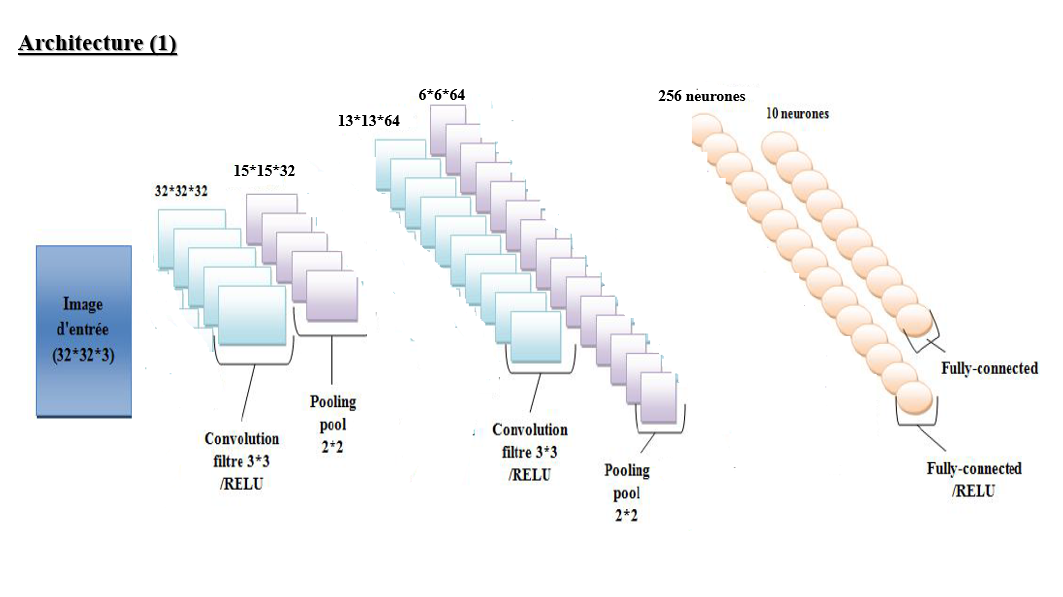

In [ ]:
# reseau de neurones à covulution

import numpy as np
from tensorflow.keras.utils import to_categorical



# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.7)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 

from keras.datasets  import cifar10

(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )
   
X_train=X_train.reshape(X_train.shape[0], 32, 32, 3)
X_train=X_train / 255.0
X_test = X_test.reshape(X_test.shape[0] , 32, 32, 3)
X_test=X_test/255.0

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test) 

class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	] 

model = tf.keras.models.Sequential([
     # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # La prémiere convolution
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


import time
start_time = time.time()

history =  model.fit(
    X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")   
test_loss =model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],test_loss )






Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 2304)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)             



*   L’image en entrée est de taille  32  * 32, l’image passe d’abord à la première couche de convolution. Cette couche est composée de 32 filtres de taille 3 * 3, la fonction d’activation ReLU est utilisé, cette fonction
d’activation force les neurones à retourner des valeurs positives, après cette convolution 32 features maps de taille 32*32 seront créés.
donc en sortie, on va obtenu une taille d'image =30 *30
 
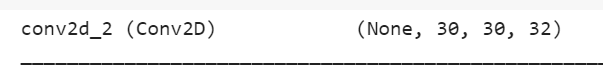

* la première des couches de mise en commun max-pooling. Je l'ai spécifié à deux par deux, transformant ainsi quatre pixels en un, donc, comme output on passe de 30 par 30, à 15 par 15. 


* Le Maxpooling est appliqué après pour réduire la taille de l’image et des
paramètres, on l'ai spécifié à deux par deux ce qui transforme ainsi quatre pixels en un.  À la sortie de cette couche, nous aurons 32 feature maps de taille 15 * 15.
On répète la même chose avec  64 filtres pour obtenir (6 * 6 * 64) =2034 comme input de la couche Flatten.
on utilise Dropout qui un est une technique de régularisation pour
réduire le overfitting, Ensuite le passage par une couche chachée de 256  neurones où la fonction d’activation
utilisée est le ReLU, et enfin la couche de sortie qui est un softmaxpermet de calculer la distribution de
probabilité des 10 classes.
 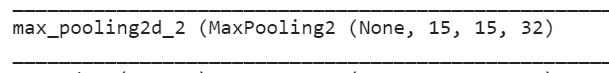

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.74      0.75      0.75      1000
 automobile	       0.79      0.86      0.83      1000
        bird       0.70      0.46      0.55      1000
         cat       0.54      0.49      0.51      1000
        deer       0.56      0.76      0.64      1000
         dog       0.67      0.53      0.59      1000
        frog       0.75      0.79      0.77      1000
       horse       0.78      0.71      0.75      1000
        ship       0.72      0.88      0.79      1000
       truck       0.76      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000





---


* Une accuracy= 0.71 sur le training,et une accuracy sur le test = 0.71. Et loss training = 0.84 et loss test=0.86
pour 7 epochs.

* Temps d'exécution =351.62 seconds (5.86 min) 
* on remarque une amélioration des performances par raport au reseau de neurones standard, par la suite on va entrainer encore notre modéle pour  notre apprentissage par l'augmentation de nombres d'epochs pour voir

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


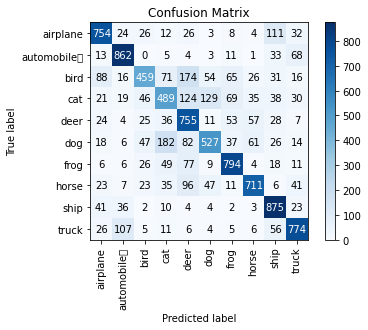

In [ ]:
#!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* A partir de  la matrice de confusion,  le modèle  a mal classé les images bird à titre d'exemple ,mais on constate une grande amélioration en comparant ces résultats à ceux qui ont obtenus par les  reseaux de neurones Standard

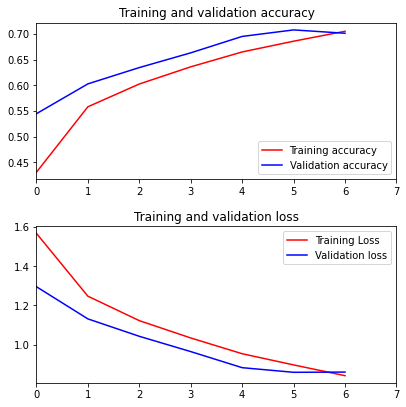

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


* L'accuracy de training et de la validation augmente avec le nombre d’epochs, ceci reflète qu’à chaque époque le modèle apprenne plus d’informations. De même, pour le loss de training et de la validation diminue avec le nombre d’epochs

# **Réseau de neurones Convolutif**


---
#Architecture (1)
 

 2.   couche de convolution:  **32** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche de convolution:  **64** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche cachée **256** neurones
 *   Mettre fin au training si on a une  **accuracy >0.9** 

In [ ]:
# reseau de neurones à covulution

import numpy as np
from tensorflow.keras.utils import to_categorical



# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.9)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 

from keras.datasets  import cifar10

(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )
   
X_train=X_train.reshape(X_train.shape[0], 32, 32, 3)
X_train=X_train / 255.0
X_test = X_test.reshape(X_test.shape[0] , 32, 32, 3)
X_test=X_test/255.0

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test) 

class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	] 

model = tf.keras.models.Sequential([
     # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # La prémiere convolution
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


import time
start_time = time.time()

history =  model.fit(
    X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")   
test_loss =model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],test_loss )






Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)              

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.77      0.80      0.79      1000
 automobile	       0.80      0.87      0.83      1000
        bird       0.68      0.58      0.62      1000
         cat       0.53      0.56      0.54      1000
        deer       0.70      0.70      0.70      1000
         dog       0.63      0.61      0.62      1000
        frog       0.75      0.83      0.79      1000
       horse       0.81      0.76      0.78      1000
        ship       0.83      0.85      0.84      1000
       truck       0.82      0.78      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000





---


* le stop training pour un nombres d'epochs= 36 et une accuracy= 0.91 sur le training, on constate une augmentation aussi  de l'accuracy sur le test = 0.73 lorsque le nombres d'pochs est augmenté de 7 à 36. Et un loss training =0.3, il a a diminué par rapport le premier appretissage un loss =083 

* Temps d'exécution =1770.49  seconds (29.50 min) 
* on remarque une amélioration des performances par raport au reseau de neurones standard, par la suite on va entrainer encore notre modéle pour  notre apprentissage par l'augmentation de nombres d'epochs pour voir

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


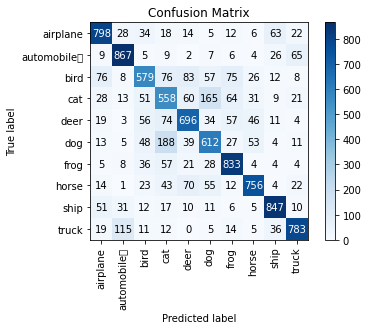

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* A partir de  la matrice de confusion, On constate une légère amélioration pour la classification des images bird et cat lorsque le nombre d'pochs a augmenté de 7 à 36

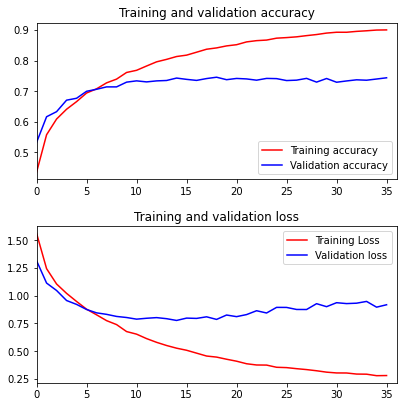

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


 l'accuracy de la  validation est presque devenue constante  après 10 epochs. 
Le loss  validation a diminué de manière linéaire, mais après  9 à 10 epochs, il est devenue constant aussi.


# **Réseau de neurones Convolutif**


---
#Architecture (2)
 

 1.    couche de convolution:  **64** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche de convolution:  **128** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche cachée **512** neurones
 *   Mettre fin au training si on a une  **accuracy >0.7** 

In [ ]:
# reseau de neurones à covulution

import numpy as np
from tensorflow.keras.utils import to_categorical



# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.7)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 

from keras.datasets  import cifar10

(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )
   
X_train=X_train.reshape(X_train.shape[0], 32, 32, 3)
X_train=X_train / 255.0
X_test = X_test.reshape(X_test.shape[0] , 32, 32, 3)
X_test=X_test/255.0

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test) 

class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	] 

model = tf.keras.models.Sequential([
     
    # La prémiere convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


import time
start_time = time.time()

history =  model.fit(
    X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")   
test_loss =model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],test_loss )






Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 4608)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)             

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.78      0.77      0.77      1000
 automobile	       0.80      0.85      0.82      1000
        bird       0.59      0.62      0.61      1000
         cat       0.60      0.40      0.48      1000
        deer       0.60      0.73      0.66      1000
         dog       0.63      0.63      0.63      1000
        frog       0.71      0.84      0.77      1000
       horse       0.77      0.76      0.77      1000
        ship       0.87      0.77      0.82      1000
       truck       0.80      0.76      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000






---


* Dans catte architecture , on a essayé d'augmenter le nombre des filtres et on gardre la taille de filtre (3,3), aussi on a augmenté  le nombre de neurones de 256 à 512. 
* ====> le modéle montre une amélioration, un accuracy(=0.71) >0.7 pour un nombre d'epochs =5 au lieu de 7 pour la premiére architecture mais le temps d'exécution est plus long

* Temps d'exécution =624.24 seconds (10.40 min) 



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


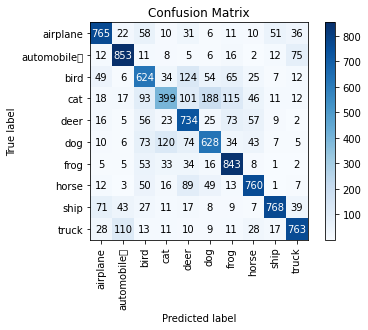

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* A partir de  la matrice de confision, on constate le modéle a mal classé les images cat et il a bien classé les images automobile à titre d'exemple.

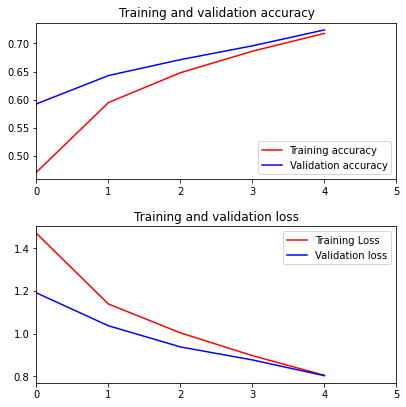

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


# **Réseau de neurones Convolutif**


---
#Architecture (2)
 

 2.  couche de convolution:  **64** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche de convolution:  **128** feature maps de taille **(3,3)**
 *   couche  MaxPooling   :(2, 2)
 *   couche cachée **512** neurones
 *   Mettre fin au training si on a une  **accuracy >0.9** 

In [ ]:
# reseau de neurones à covulution

import numpy as np
from tensorflow.keras.utils import to_categorical



# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.9)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 

from keras.datasets  import cifar10

(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )
   
X_train=X_train.reshape(X_train.shape[0], 32, 32, 3)
X_train=X_train / 255.0
X_test = X_test.reshape(X_test.shape[0] , 32, 32, 3)
X_test=X_test/255.0

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test) 

class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	] 

model = tf.keras.models.Sequential([
     
    # La prémiere convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


import time
start_time = time.time()

history =  model.fit(
    X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")   
test_loss =model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],test_loss )






Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)              

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.78      0.75      0.77      1000
 automobile	       0.87      0.82      0.85      1000
        bird       0.63      0.66      0.64      1000
         cat       0.53      0.56      0.54      1000
        deer       0.70      0.68      0.69      1000
         dog       0.67      0.61      0.64      1000
        frog       0.82      0.81      0.82      1000
       horse       0.77      0.79      0.78      1000
        ship       0.84      0.85      0.84      1000
       truck       0.79      0.85      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000





---


* Dans catte architecture , on a modifié la condition de stop training,  le fonction stop est realisée lorque l'accuracy est > 0.9. le resultat montre que à 16 epochs, le modéle a réalisé cette accuracy.
* ====> On constate une améloiration comparant avec l'architecture (1):

 * Apres 36 epochs, le modéle mettre fin pour une accuracy >0.9 p

* Temps d'exécution =1995.20 seconds (33.25 min) 


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


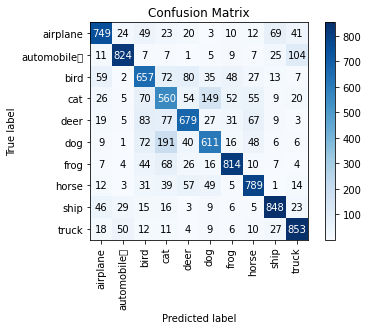

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

* A partir ce cette matrice de confusion, on peut remarquer que le modéle a mieux classé les images  pour 16 epochs en comparant avec l'architecture (1) dont le nombre d'pochs =36. 

# **Réseau de neurones Convolutif**


---
#Architecture (3)
 

 1.    couche de convolution:  **128** feature maps de taille **(5,5)**
 *   couche  MaxPooling   :(2, 2)
 *   couche de convolution:  **256** feature maps de taille **(5,5)**
 *   couche  MaxPooling   :(2, 2)
 *   couche cachée **1024** neurones
 *   Mettre fin au training si on a une  **accuracy >0.7** 

In [ ]:
# reseau de neurones à covulution

import numpy as np
from tensorflow.keras.utils import to_categorical



# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.7)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.7):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 

from keras.datasets  import cifar10

(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )
   
X_train=X_train.reshape(X_train.shape[0], 32, 32, 3)
X_train=X_train / 255.0
X_test = X_test.reshape(X_test.shape[0] , 32, 32, 3)
X_test=X_test/255.0

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test) 

class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	] 

model = tf.keras.models.Sequential([
     
    # La prémiere convolution
  tf.keras.layers.Conv2D(128, (5,5), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


import time
start_time = time.time()

history =  model.fit(
    X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")   
test_loss =model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],test_loss )






Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 128)       9728      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 256)       819456    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6400)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)            

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.63      0.84      0.72      1000
 automobile	       0.82      0.79      0.81      1000
        bird       0.52      0.65      0.58      1000
         cat       0.52      0.44      0.48      1000
        deer       0.66      0.58      0.62      1000
         dog       0.69      0.42      0.52      1000
        frog       0.76      0.76      0.76      1000
       horse       0.66      0.80      0.72      1000
        ship       0.85      0.76      0.80      1000
       truck       0.76      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000





---


* Dans catte architecture , on a augmenté le nombre de filtres et on a modifié la taille de (3,3) à (5,5) aussi on a augmenté le nombre de neurones de 512 à 1024. On remarque que la modification de taille de filtre engedre une diminution d'accuracy sur le test = 0.68 par rapport a ce qui est obtenu dans l'architecture (1) et (2)

* Temps d'exécution =3682.78 seconds ( 61.37 min) 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


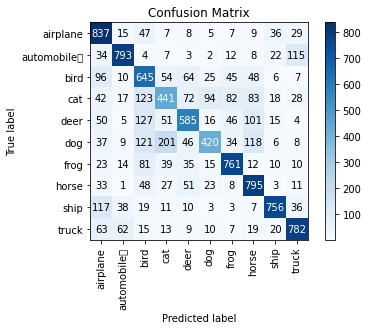

In [ ]:

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

*  On constate  le modéle a bien classé les images airplane automobile et horse  et il  a mal classé les images cat  deer et dog 

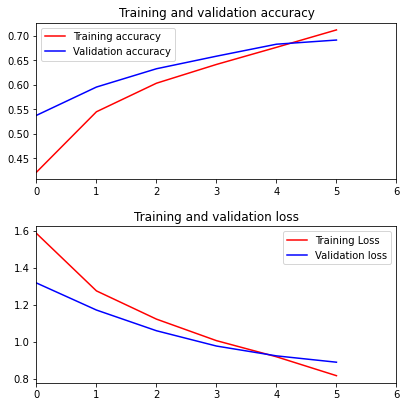

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.8, top = 0.8, wspace = 0, hspace = 0.3)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = history.epoch
axes = figure.add_subplot(2, 1, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.gca().set_xlim(left=0,  right=len(acc))
plt.title('Training and validation accuracy')
plt.legend(loc=0)

axes = figure.add_subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.gca().set_xlim(left=0,  right=len(epochs))
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()


* L'accuracy de training et de la validation augmente avec le nombre d’epochs, ceci reflète qu’à chaque époque le modèle apprenne plus d’informations. De même, pour le loss de training et de la validation diminue avec le nombre d’epochs

# **Réseau de neurones Convolutif**


---
#Architecture (3)
 

 2.  couche de convolution:  **128** feature maps de taille **(5,5)**
 *   couche  MaxPooling   :(2, 2)
 *   couche de convolution:  **256** feature maps de taille **(5,5)**
 *   couche  MaxPooling   :(2, 2)
 *   couche cachée **1024** neurones
 *    Mettre fin au training si on a une  **accuracy >0.9** 

In [ ]:
# reseau de neurones à covulution

import numpy as np
from tensorflow.keras.utils import to_categorical



# Foction qui permet d'interrompre l'entrainement si accuracy > seuil predéfini (0.9)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
             
callbacks=myCallback() 

from keras.datasets  import cifar10

(X_train, y_train ),(X_test , y_test ) = cifar10.load_data ( )
   
X_train=X_train.reshape(X_train.shape[0], 32, 32, 3)
X_train=X_train / 255.0
X_test = X_test.reshape(X_test.shape[0] , 32, 32, 3)
X_test=X_test/255.0

# One-hot-encoding
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test) 

class_names = ['airplane', 'automobile	', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck'	] 

model = tf.keras.models.Sequential([
     
    # La prémiere convolution
  tf.keras.layers.Conv2D(128, (5,5), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


import time
start_time = time.time()

history =  model.fit(
    X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, 
    verbose=1,callbacks=[callbacks])
print("\n--- %s seconds ---" % (time.time() - start_time))
print("\n Model.evaluate : ")   
test_loss =model.evaluate(X_test , y_test)

print("\nLoss_training, Accuracy_training,  Accuracy_validation , [Loss_test, Accuracy_test] ")  
print((history.history['loss'][-1],  history.history['accuracy'][-1]), history.history['val_accuracy'][-1],test_loss )






170500096/170498071 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6400)              0         
_______________________________________________________

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.81      0.74      0.77      1000
 automobile	       0.86      0.84      0.85      1000
        bird       0.65      0.62      0.64      1000
         cat       0.54      0.50      0.52      1000
        deer       0.64      0.68      0.66      1000
         dog       0.64      0.61      0.63      1000
        frog       0.76      0.83      0.79      1000
       horse       0.72      0.79      0.76      1000
        ship       0.86      0.83      0.85      1000
       truck       0.78      0.84      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000





---


* Dans catte architecture , on a augmenté le nombre de filtres et on a modifié la taille de (3,3) à (5,5) aussi on a augmenté le nombre de neurones de 512 à 1024. On remarque que aprés 28 epochs, l'accuracy sur le training est 91 % et l'accuracy sur le test =73% avec un loss= 0.93

* ====> Malgré l'augmentation de nombre de neurones et de nombre de de filtres, la tailles de ces filtres ont un impact direct sur l'accuracy de test : Pas d'amélioration par rapport aux architectures (1) et (2).

* Temps d'exécution =14337.801 seconds ( 3.98 Heure) 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


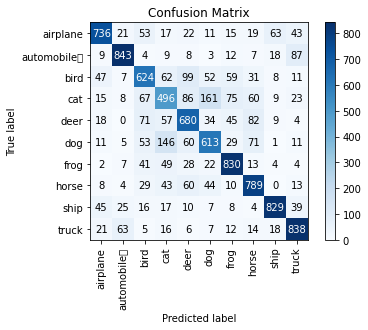

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(
    [class_names[y] for y in y_test.argmax(axis=1)], 
    [class_names[y] for y in y_pred], 
    normalize=False, x_tick_rotation=90
    )
plt.show()

**Remarque** : l'architecture (3) n'améliore pas l'accuracy sur le test en comparaison avec les architectures (1) et (2):  **Voir Tableau ci dessous**.

# **V. Conclusion**

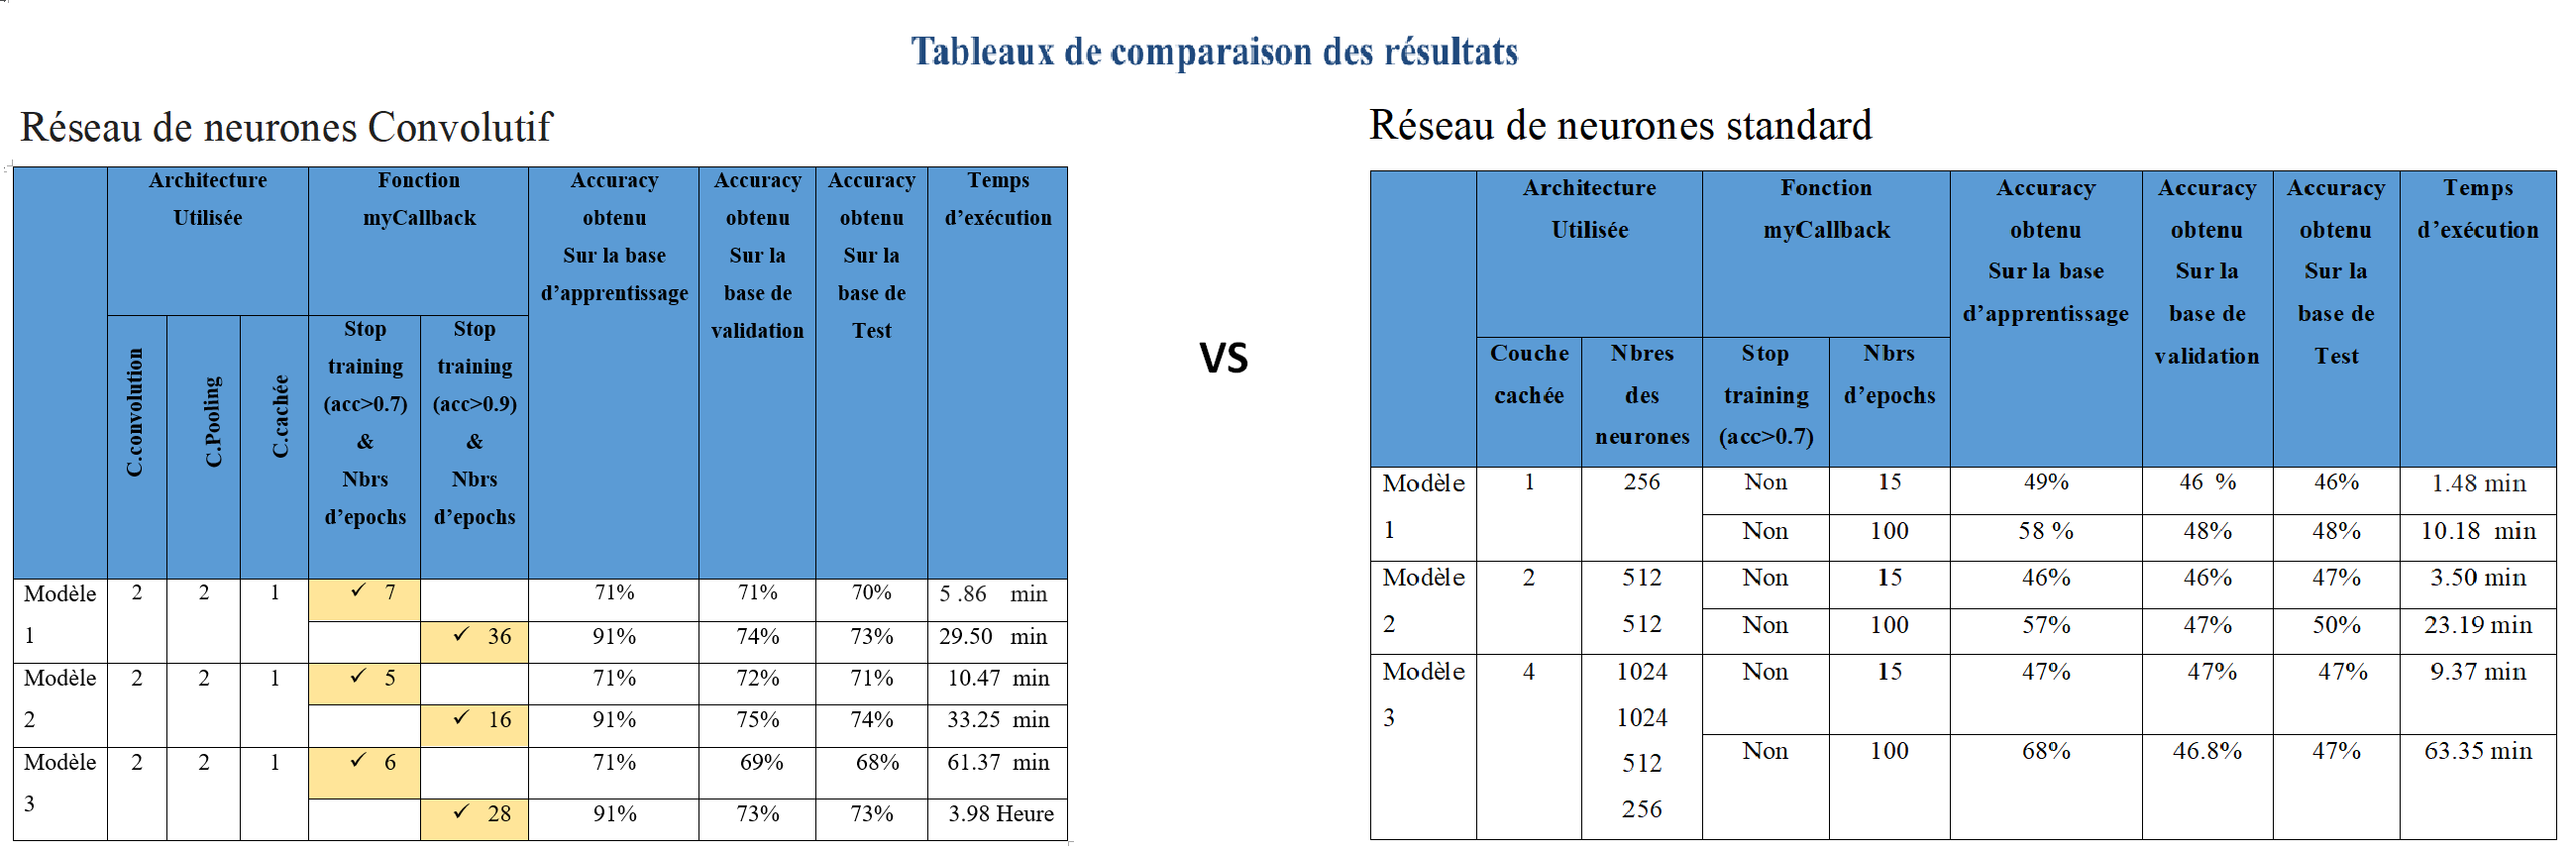

* A partir du tableaux ci dessus, on Constate que pour toutes les architectures utilisées pour le réseau de neurones Convolutif, le taux d'accuracy sur le test varie entre 68 % à 74% avec un nombre d'epochs de [5 à 36] par contre, pour le réseau de neurones Standard et malgré toutes les architectures utilisées et l'augmentation de nombre d'epochs jusqu'a 100, le taux d'accuracu sur le test ne depasse pas 50%.

* Le réseau de neurones Convolutif est plus performant  pour  la classification d’images.